In [1]:
""" 
Goal: 
    - We clean the data
    - Now we need to analysis 
    - What variables is important and what it says
    - Thought the EDA
    
Author: Rudra Prasad Bhuyan
"""

' \nGoal: \n    - We clean the data\n    - Now we need to analysis \n    - What variables is important and what it says\n    - Thought the EDA\n\nAuthor: Rudra Prasad Bhuyan\n'

In [2]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
colors = ['#cb17eb', '#17EBC8', '#A4EB17', '#EB173A', '#ffde59']  
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

In [4]:
palette = ['#cb17eb', '#17EBC8', '#A4EB17', '#EB173A', '#ffde59']  
sns.set_palette(palette)

In [5]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-02\data2\lev_02_mp_clean.parquet"

pdf = pl.read_parquet(path)

In [6]:
pdf.collect_schema()

Schema([('Revisit_Status', Int32),
        ('FDQ_Original_Member', Int32),
        ('Multiplier', Int32),
        ('Meals_Usually_Taken_Per_Day', Int32),
        ('Meals_From_School', Int32),
        ('Meals_From_Employer', Int32),
        ('Meals_Other', Int32),
        ('Meals_On_Payment', Int32),
        ('Meals_At_Home', Int32),
        ('Used_Internet_Last_30_Days', Int32),
        ('Days_Away_From_Home_Last_30_Days', Int32),
        ('FSU_Serial_No', Int32),
        ('Relation_to_Head', Int32),
        ('Gender', Int32),
        ('Age', Int32),
        ('Marital_Status', Int32),
        ('Education_Level', Int32),
        ('Years_of_Education', Int32)])

In [7]:
marital_mapping = {
    1:'Unmarried',
    2:'Married',
    3:'Widowed',
    4:'Divorced'
}

gender_mapping = {
    1: 'Male',
    2: 'Female',
    3: 'Transgender'
}


"""
pdf = pdf.with_columns(
    pl.col('Marital_Status').map_dict(marital_mapping).alias('Marital_Status'),
    pl.col('Gender').map_dict(gender_mapping).alias('Gender')
)
"""

"\npdf = pdf.with_columns(\n    pl.col('Marital_Status').map_dict(marital_mapping).alias('Marital_Status'),\n    pl.col('Gender').map_dict(gender_mapping).alias('Gender')\n)\n"

#  1. Basic Demographic Exploration

### What is the **age distribution** ?

In [8]:
age_df = pdf['Age'].value_counts().to_pandas()
age_df = age_df.sort_values(by='count', ascending=False)

In [9]:
age_df.describe()

,Age,count
count,100.000000,100.000000
mean,50.730000,649.520000
std,29.402073,558.877292
min,1.000000,1.000000
25%,25.750000,76.250000
50%,50.500000,559.500000
75%,75.250000,1147.500000
max,105.000000,1857.000000


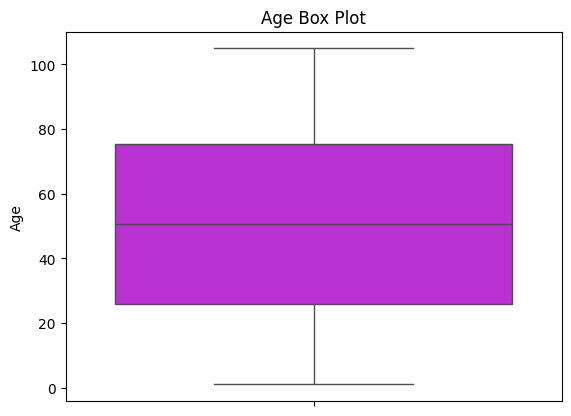

In [10]:
sns.boxplot(age_df['Age'])
plt.title('Age Box Plot')
plt.show()

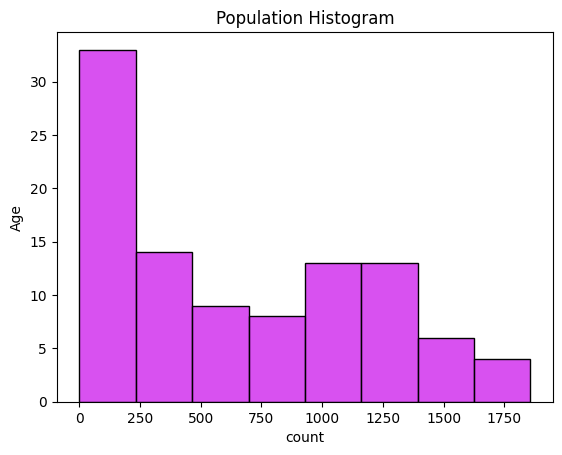

In [11]:
sns.histplot(age_df['count'])
plt.title('Population Histogram')
plt.ylabel('Age')
#plt.xlabel('')
plt.show()

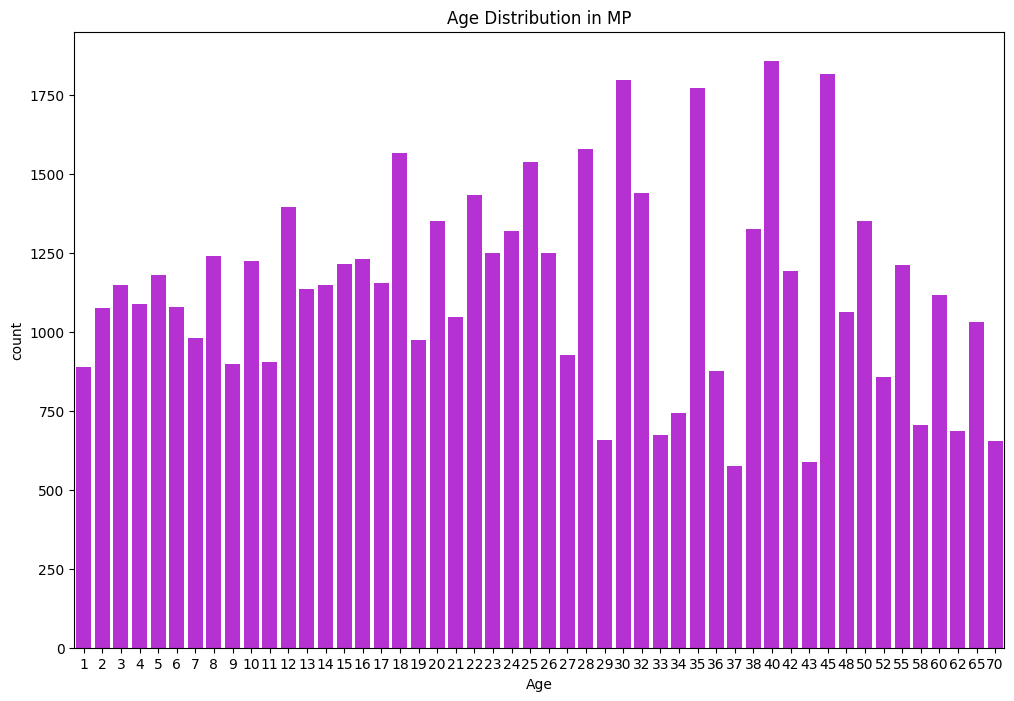

In [12]:
plt.figure(figsize=(12, 8))

sns.barplot(
    data=age_df.head(50),
    x='Age',
    y='count',
    color='#c817eb'
)
plt.title('Age Distribution in MP')
plt.show()

### What is the **gender ratio** ?

,Gender,count
0,Female,31318
1,Male,33627
2,Transgender,7


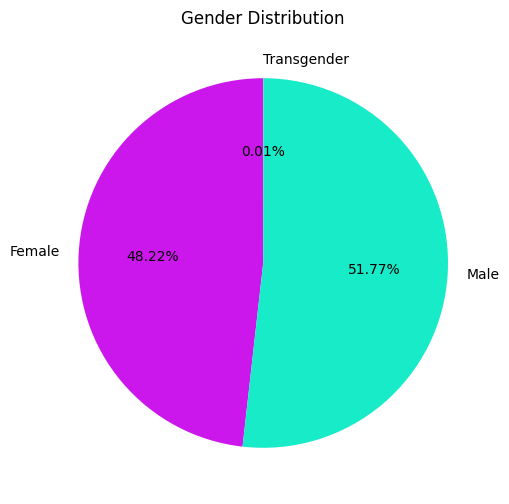

In [13]:
gender_counts = pdf['Gender'].value_counts().to_pandas()
gender_mapping = {
    1: 'Male',
    2: 'Female',
    3: 'Transgender'
}
gender_counts['Gender'] = gender_counts['Gender'].replace(gender_mapping)
display(gender_counts)

plt.figure(figsize=(6, 6))
plt.pie(gender_counts['count'], labels=gender_counts["Gender"], autopct='%1.2f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

### What are the most common **marital statuses**?

,Marital_Status,count
0,Married,33583
1,Unmarried,27911
2,Widowed,3187
3,Divorced,271


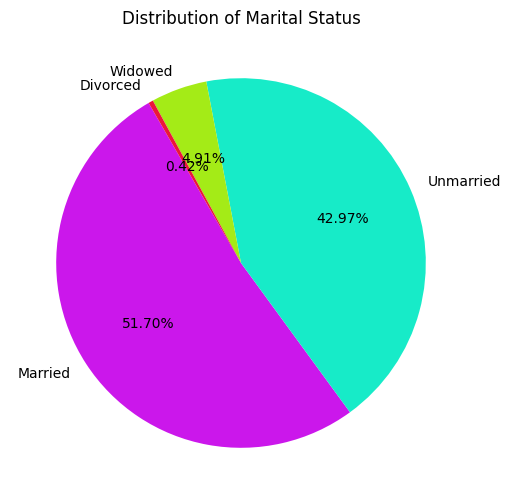

In [14]:
marital_status_count = pdf['Marital_Status'].value_counts(sort=True).to_pandas()
marital_mapping = {
    1:'Unmarried',
    2:'Married',
    3:'Widowed',
    4:'Divorced'
}
marital_status_count['Marital_Status'] = marital_status_count['Marital_Status'].replace(marital_mapping)
display(marital_status_count)

plt.figure(figsize=(6, 6))
plt.pie(
    marital_status_count['count'],                
    labels=marital_status_count['Marital_Status'],
    autopct='%1.2f%%',                            
    startangle=120
)
plt.title("Distribution of Marital Status")
plt.show()

### How is **education level** distributed across the population?

In [15]:
education_level_count = pdf['Education_Level'].value_counts().to_pandas()
education_level_count.sort_values(by='Education_Level', inplace=True)

In [16]:
education_level_count.sort_values(by='count')

,Education_Level,count
8,8,63
1,10,157
10,11,173
3,2,1160
7,13,1820
4,12,5462
9,7,5812
5,6,6585
2,3,7846
11,4,9672


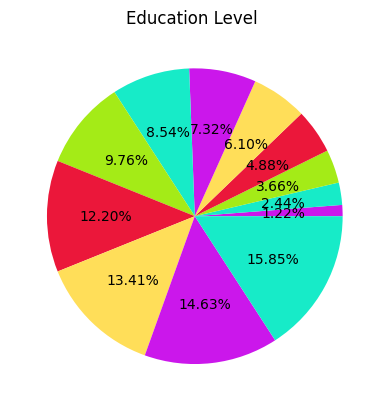

In [17]:
plt.pie(
    education_level_count['Education_Level'],
    autopct='%1.2f%%',
)
plt.title('Education Level ')
plt.show()

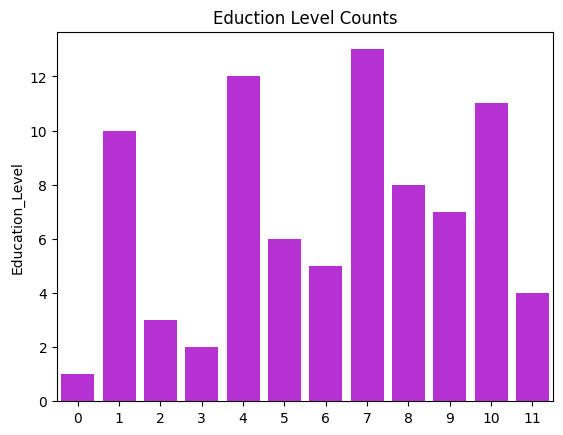

In [18]:
sns.barplot(education_level_count['Education_Level'], color='#c817eb')
plt.title('Eduction Level Counts')
plt.show()

| Value | Category                                                                                          |
| ----- | ------------------------------------------------------------------------------------------------- |
| 01    | not literate (i.e. not able to read or write a simple message with understanding in any language) |
| 02    | literate with non-formal education (like, NFEC, AEC, TLC, literate without any schooling, etc.)   |
| 03    | literate with formal education: below primary                                                     |
| 04    | literate with formal education: primary                                                           |
| 05    | literate with formal education: upper primary/ middle                                             |
| 06    | literate with formal education: secondary                                                         |
| 07    | literate with formal education: higher secondary                                                  |
| 08    | literate with formal education: diploma /certificate course (upto secondary)                      |
| 10    | literate with formal education: diploma /certificate course (upto higher secondary)               |
| 11    | literate with formal education: diploma /certificate course (graduation and above)                |
| 12    | literate with formal education: graduate                                                          |
| 13    | literate with formal education: post graduate and above                                           |

### How many respondents are **revisit cases** ?

,Revisit_Status,Count,percentage
0,1,64797,99.761362
1,3,88,0.135485
2,2,67,0.103153


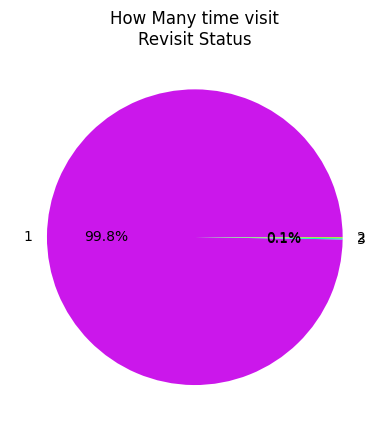

In [19]:
total = pdf.height

revisit_count= (
    pdf.group_by('Revisit_Status')
        .agg(
            pl.len().alias('Count'),
            ((pl.len() / total) * 100 ).alias('percentage')
        )
        .sort('Count', descending=True)
).to_pandas()

display(revisit_count)

plt.pie(
    revisit_count['percentage'],
    autopct='%1.1f%%',
    labels=revisit_count['Revisit_Status']
)
plt.title('How Many time visit\nRevisit Status')
plt.show()

# 2. Education & Age Relationship

## How does **Years_of_Education** vary with **Age**?

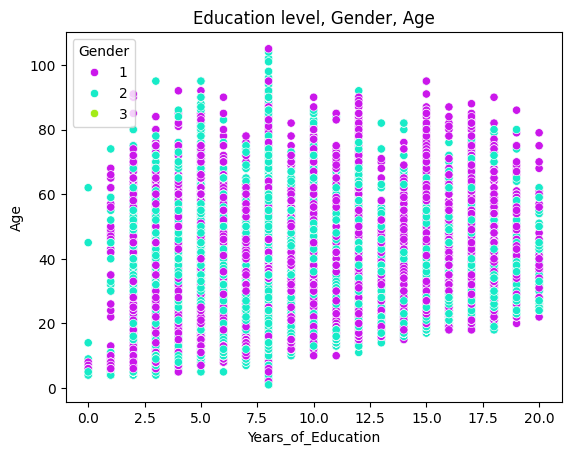

In [59]:
age_eduction_df = pdf['Years_of_Education', 'Age', 'Gender'].to_pandas()

plt.Figure(figsize=(12, 10))
sns.scatterplot(
    age_eduction_df,
    x='Years_of_Education',
    y='Age',
    hue='Gender',
    palette=palette[:3],
)

plt.title('Education level, Gender, Age')
plt.show()

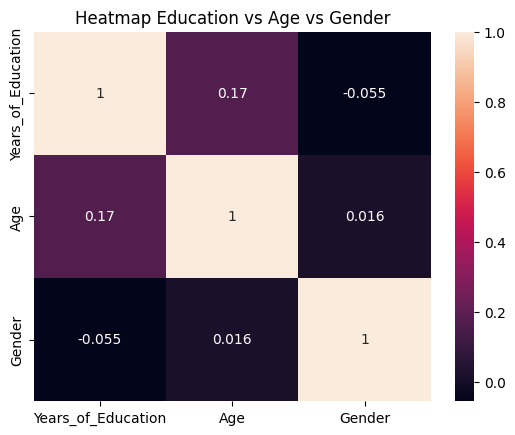

In [55]:
sns.heatmap(age_eduction_df.corr(), annot=True)
plt.title('Heatmap Education vs Age vs Gender')
plt.show()

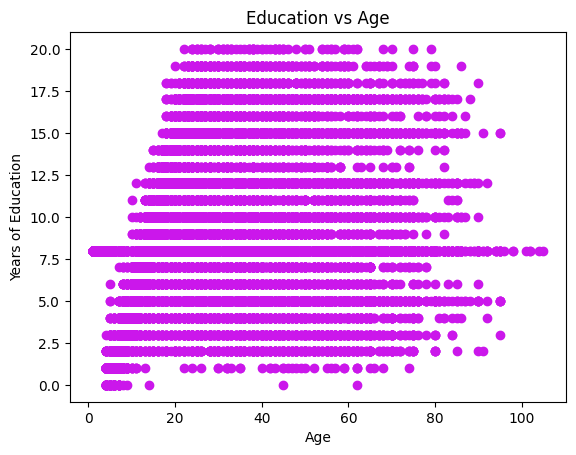

In [22]:
plt.scatter(pdf['Age'], pdf['Years_of_Education'])
plt.xlabel('Age')
plt.ylabel('Years of Education')
plt.title('Education vs Age')
plt.show()


## Is there a **difference in education level** by **gender**?

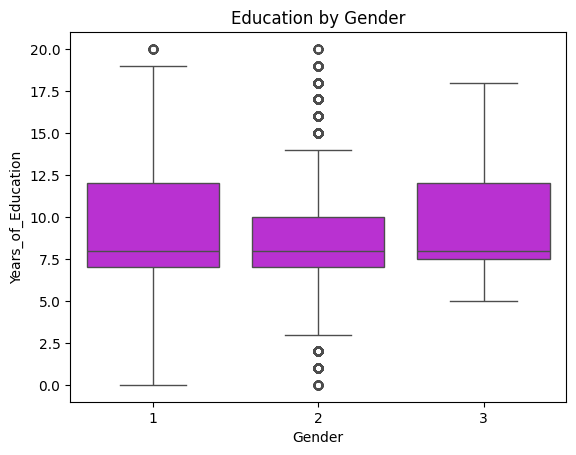

In [23]:
sns.boxplot(x='Gender', y='Years_of_Education', data=pdf.to_pandas())
plt.title('Education by Gender')
plt.show()


## What is the **relationship between marital status and education**?

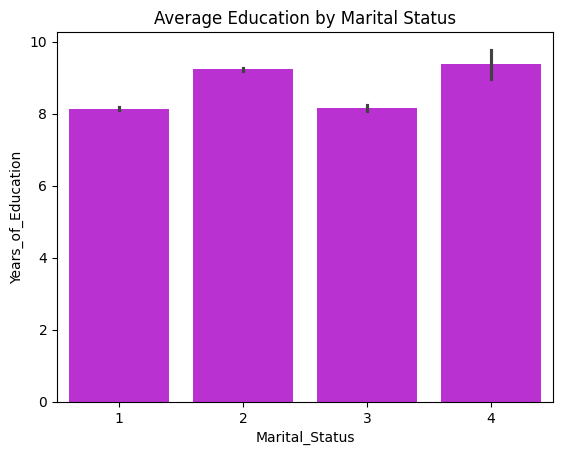

In [24]:
sns.barplot(x='Marital_Status', y='Years_of_Education', data=pdf['Years_of_Education', 'Marital_Status'].to_pandas())
plt.title('Average Education by Marital Status')
plt.show()


In [ ]:
# 1:Unmarried
# 2:Married(including living together)
# 3:Widowed
# 4:Divorced/separated

## Does higher education correspond to different food or meal behavior?

,Education_Level,Meals_Usually_Taken_Per_Day,Meals_From_School,Meals_From_Employer,Meals_Other,Meals_On_Payment,Meals_At_Home
Education_Level,1.000000,-0.176593,-0.096411,0.002743,0.006651,0.075994,-0.171374
Meals_Usually_Taken_Per_Day,-0.176593,1.000000,0.233693,-0.006730,0.028700,-0.036234,0.925524
Meals_From_School,-0.096411,0.233693,1.000000,-0.004608,-0.021193,-0.011494,-0.019776
Meals_From_Employer,0.002743,-0.006730,-0.004608,1.000000,0.000926,-0.000627,-0.067275
Meals_Other,0.006651,0.028700,-0.021193,0.000926,1.000000,0.008613,-0.108024
Meals_On_Payment,0.075994,-0.036234,-0.011494,-0.000627,0.008613,1.000000,-0.135421
Meals_At_Home,-0.171374,0.925524,-0.019776,-0.067275,-0.108024,-0.135421,1.000000


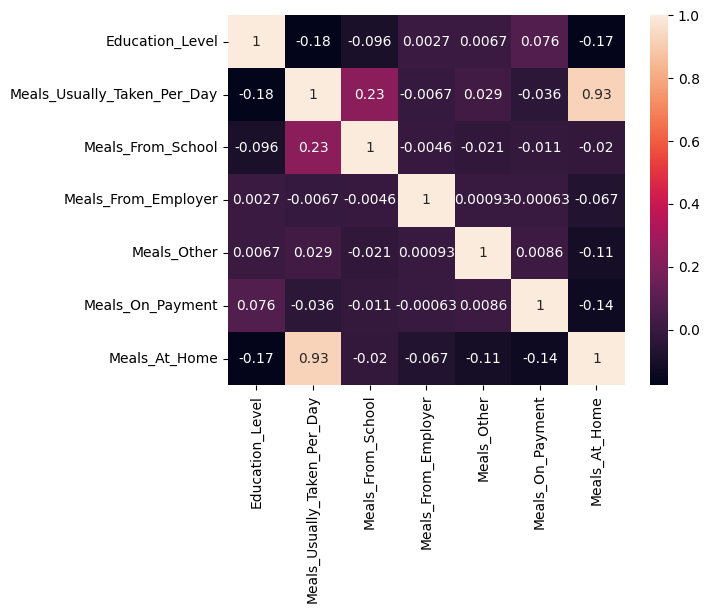

In [25]:
edu_meal_df = pdf[
     'Education_Level',
     'Meals_Usually_Taken_Per_Day',
 'Meals_From_School',
 'Meals_From_Employer',
 'Meals_Other',
 'Meals_On_Payment',
 'Meals_At_Home'].to_pandas()

heat = edu_meal_df.corr()

display(heat)
sns.heatmap(heat, annot=True)
plt.show()

# 3. Meal Behavior Analysis

In [26]:
edu_meal_df .mean()

Education_Level                 4.703458
Meals_Usually_Taken_Per_Day     2.306195
Meals_From_School               0.910365
Meals_From_Employer             0.019630
Meals_Other                     0.527744
Meals_On_Payment                0.177131
Meals_At_Home                  67.540907
dtype: float64

## What’s the **average number of meals per day**?

In [27]:
print(f"A user basically take the {pdf['Meals_Usually_Taken_Per_Day'].mean().__floor__()} mean per day" )

A user basically take the 2 mean per day


## Is there a correlation between **Meals_On_Payment** and **education level**?

In [28]:
pdf['Meals_On_Payment', 'Education_Level'].corr()

Meals_On_Payment,Education_Level
f64,f64
1.0,0.075994
0.075994,1.0


## How do **Meals_From_School**, **Meals_From_Employer**, and **Meals_At_Home** differ by **age or gender**?

In [29]:
meal_cols = ['Meals_Usually_Taken_Per_Day','Meals_From_School','Meals_From_Employer',
             'Meals_Other','Meals_On_Payment','Meals_At_Home']

gender_meals = pdf.group_by('Gender').agg(
    [pl.col(col).mean().alias(col) for col in meal_cols]
)

display(gender_meals)

Gender,Meals_Usually_Taken_Per_Day,Meals_From_School,Meals_From_Employer,Meals_Other,Meals_On_Payment,Meals_At_Home
i32,f64,f64,f64,f64,f64,f64
1,2.31442,0.902221,0.035121,0.578791,0.221727,67.813126
2,2.297369,0.919312,0.003001,0.473051,0.129287,67.24826
3,2.285714,0.0,0.0,0.0,0.0,69.142857


## What percentage of people take meals mostly **at home** vs. **outside**?

In [30]:
pdf['Meals_At_Home'].describe()

statistic,value
str,f64
"""count""",64952.0
"""null_count""",0.0
"""mean""",67.540907
"""std""",15.323768
"""min""",0.0
"""25%""",60.0
"""50%""",60.0
"""75%""",87.0
"""max""",95.0


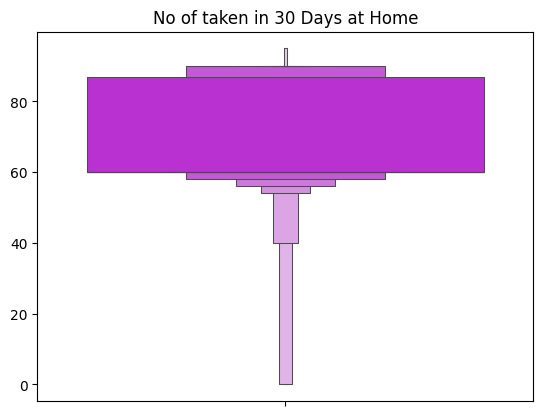

In [60]:
sns.boxenplot(pdf['Meals_At_Home'])
plt.title('No of taken in 30 Days at Home')
plt.show()

- This means most of the people take 2 times a day


# 4. Lifestyle and Mobility


## What percentage of respondents **used the internet in the last 30 days**?


In [32]:
pdf['Used_Internet_Last_30_Days'].describe()

statistic,value
str,f64
"""count""",64952.0
"""null_count""",0.0
"""mean""",0.555056
"""std""",0.496963
"""min""",0.0
"""25%""",0.0
"""50%""",1.0
"""75%""",1.0
"""max""",1.0


,Used_Internet_Last_30_Days,count
0,Yes,36052
1,No,28900


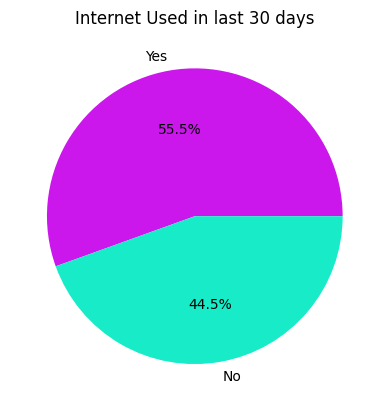

In [61]:
internet_30 = pdf['Used_Internet_Last_30_Days'].value_counts().to_pandas()
net_mapping = {
    1: 'Yes',
    0: 'No'
}
internet_30['Used_Internet_Last_30_Days'] = internet_30['Used_Internet_Last_30_Days'].replace(net_mapping)
display(internet_30)

plt.pie(
    x=internet_30['count'],
    labels=internet_30['Used_Internet_Last_30_Days'],
   autopct='%1.1f%%' 
)
plt.title('Internet Used in last 30 days')
plt.show()

## Is with age internet used increased ?

In [34]:
""" 
1:Unmarried, 
2:Married(including living together), 
3:Widowed,  
4:Divorced
"""

' \n1:Unmarried, \n2:Married(including living together), \n3:Widowed,  \n4:Divorced\n'

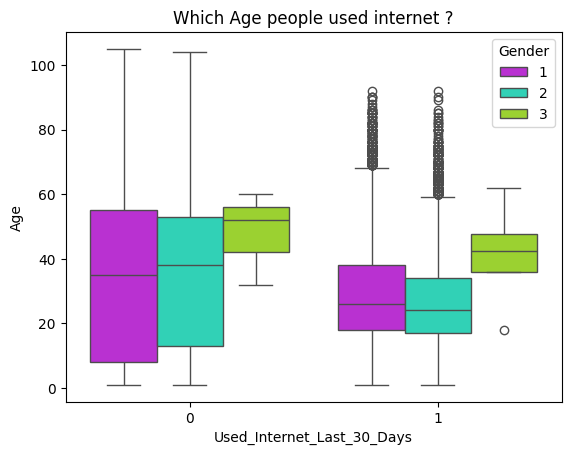

In [35]:
sns.boxplot(x='Used_Internet_Last_30_Days', y='Age', hue='Gender', 
            palette=palette[:3], data=pdf['Used_Internet_Last_30_Days', 'Age', 'Gender'].to_pandas())
plt.title('Which Age people used internet ?')
plt.show()

## Is **internet use** higher among **younger or more educated** individuals?


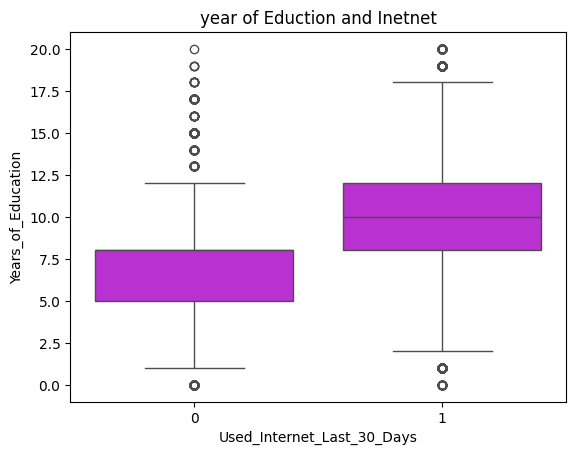

In [36]:
sns.boxplot(x='Used_Internet_Last_30_Days', y='Years_of_Education',
            data=pdf['Used_Internet_Last_30_Days', 'Years_of_Education', 'Gender'].to_pandas())
plt.title('year of Eduction and Inetnet')
plt.show()

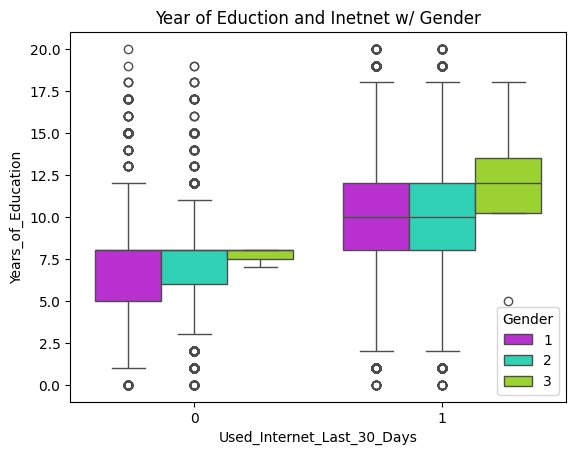

In [62]:
sns.boxplot(x='Used_Internet_Last_30_Days', y='Years_of_Education', hue='Gender', palette=palette[:3],
            data=pdf['Used_Internet_Last_30_Days', 'Years_of_Education', 'Gender'].to_pandas())
plt.title('Year of Eduction and Inetnet w/ Gender')
plt.show()

## How many **days away from home** do people spend, and how does it relate to age or occupation?


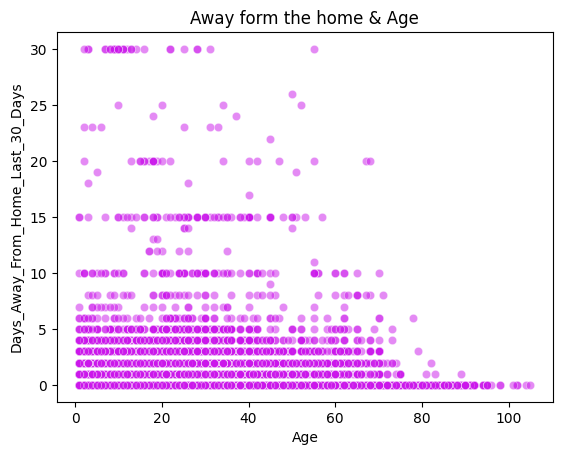

In [38]:
sns.scatterplot(x='Age', y='Days_Away_From_Home_Last_30_Days', data=pdf['Days_Away_From_Home_Last_30_Days', 'Age', 'Gender'].to_pandas(), alpha=0.5)
plt.title('Away form the home & Age')
plt.show()

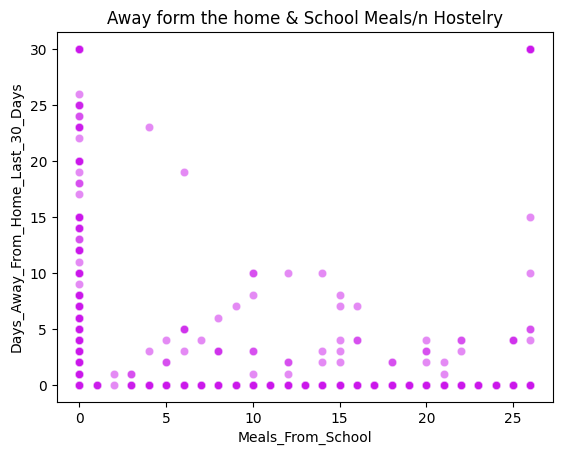

In [63]:
sns.scatterplot(x='Meals_From_School', y='Days_Away_From_Home_Last_30_Days', data=pdf.to_pandas(), alpha=0.5)
plt.title('Away form the home & School Meals/n Hostelry')
plt.show()

##  Are people who travel more also more likely to eat out (higher **Meals_On_Payment**)?


In [40]:
pdf['Meals_On_Payment'].describe()

statistic,value
str,f64
"""count""",64952.0
"""null_count""",0.0
"""mean""",0.177131
"""std""",2.331079
"""min""",0.0
"""25%""",0.0
"""50%""",0.0
"""75%""",0.0
"""max""",88.0


- No changes, same 2 meal per day
- It means may be they are labour

# 5. Household and Relationship Factors


## What’s the distribution of **Relation_to_Head**?


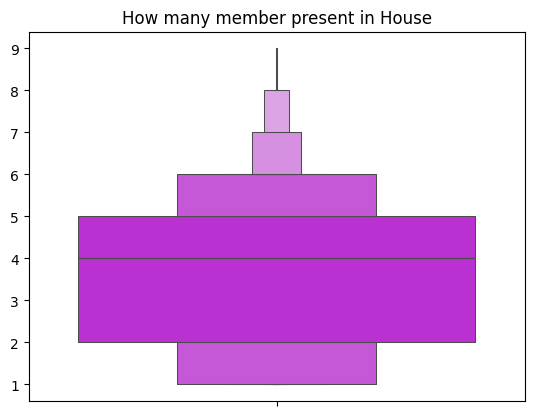

In [64]:
sns.boxenplot(pdf['Relation_to_Head'])
plt.title('How many member present in House')
plt.show()

In [42]:
pdf['Relation_to_Head'].describe()

statistic,value
str,f64
"""count""",64952.0
"""null_count""",0.0
"""mean""",3.630142
"""std""",2.006095
"""min""",1.0
"""25%""",2.0
"""50%""",4.0
"""75%""",5.0
"""max""",9.0



## Do **heads of household** differ significantly in **age or education** from others?


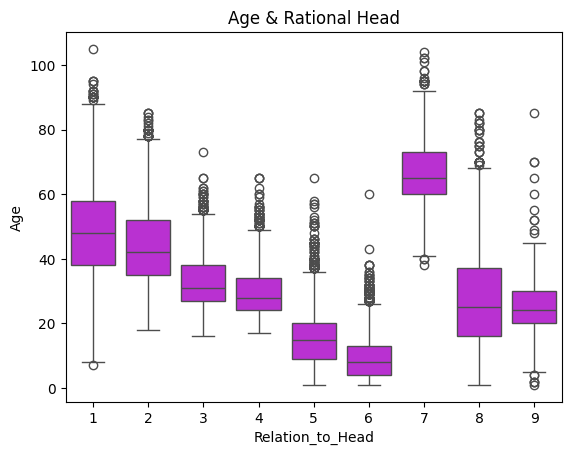

In [43]:
sns.boxplot(
    data=pdf['Relation_to_Head', 'Age'].to_pandas(),
    x='Relation_to_Head',
    y='Age'
)
plt.title('Age & Rational Head')
plt.show()

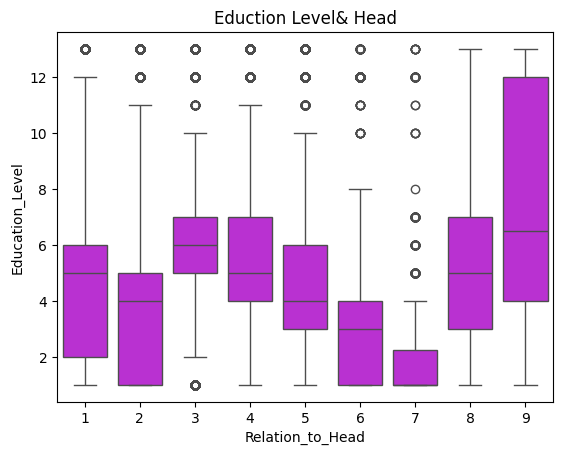

In [44]:
sns.boxplot(
    data=pdf['Relation_to_Head', 'Education_Level'].to_pandas(),
    x='Relation_to_Head',
    y='Education_Level'
)

plt.title('Eduction Level& Head')
plt.show()


## How does **household role** affect meal habits or internet use?

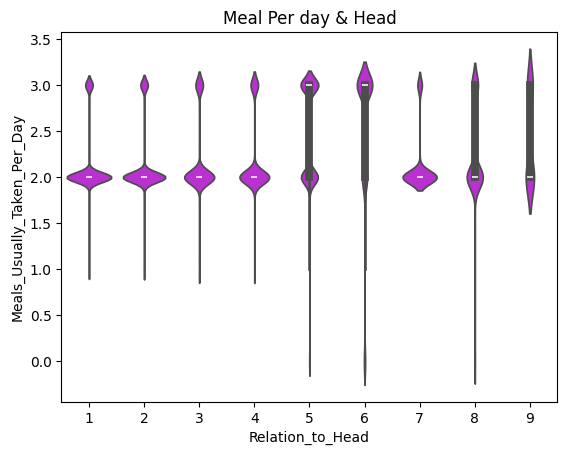

In [45]:
sns.violinplot(
    data=pdf['Relation_to_Head', 'Meals_Usually_Taken_Per_Day'].to_pandas(),
    x='Relation_to_Head',
    y='Meals_Usually_Taken_Per_Day'
)

plt.title('Meal Per day & Head')
plt.show()

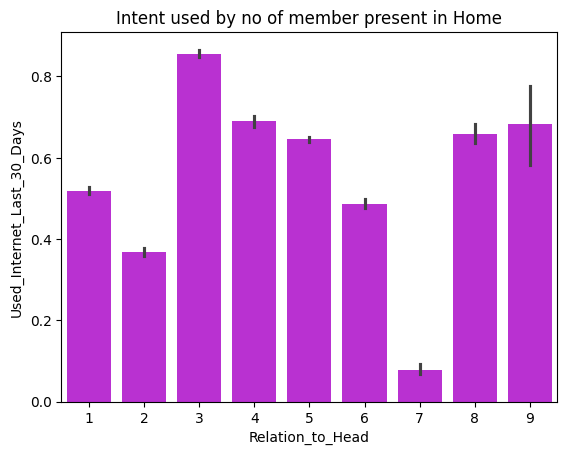

In [46]:
sns.barplot(
    data=pdf['Relation_to_Head', 'Used_Internet_Last_30_Days'].to_pandas(),
    x='Relation_to_Head',
    y='Used_Internet_Last_30_Days'
)
plt.title('Intent used by no of member present in Home')
plt.show()

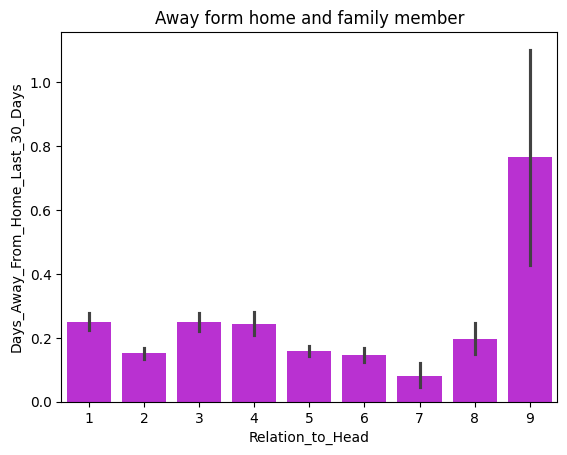

In [47]:
sns.barplot(
    data=pdf['Relation_to_Head', 'Days_Away_From_Home_Last_30_Days'].to_pandas(),
    x='Relation_to_Head',
    y='Days_Away_From_Home_Last_30_Days'
)
plt.title('Away form home and family member')
plt.show()

In [48]:
pdf.columns

['Revisit_Status',
 'FDQ_Original_Member',
 'Multiplier',
 'Meals_Usually_Taken_Per_Day',
 'Meals_From_School',
 'Meals_From_Employer',
 'Meals_Other',
 'Meals_On_Payment',
 'Meals_At_Home',
 'Used_Internet_Last_30_Days',
 'Days_Away_From_Home_Last_30_Days',
 'FSU_Serial_No',
 'Relation_to_Head',
 'Gender',
 'Age',
 'Marital_Status',
 'Education_Level',
 'Years_of_Education']

In [49]:
pdf.schema

Schema([('Revisit_Status', Int32),
        ('FDQ_Original_Member', Int32),
        ('Multiplier', Int32),
        ('Meals_Usually_Taken_Per_Day', Int32),
        ('Meals_From_School', Int32),
        ('Meals_From_Employer', Int32),
        ('Meals_Other', Int32),
        ('Meals_On_Payment', Int32),
        ('Meals_At_Home', Int32),
        ('Used_Internet_Last_30_Days', Int32),
        ('Days_Away_From_Home_Last_30_Days', Int32),
        ('FSU_Serial_No', Int32),
        ('Relation_to_Head', Int32),
        ('Gender', Int32),
        ('Age', Int32),
        ('Marital_Status', Int32),
        ('Education_Level', Int32),
        ('Years_of_Education', Int32)])

In [50]:
# Done 🙌